> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

I selected 'noshowappointments-kagglev2-may-2016.csv' to do this project.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Assess data
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [5]:
# check datatype
# No missing data but schedule day and appointment day is not in date time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Change format of day to datetime. Create new column to show appointment day of week

In [6]:

x = df['ScheduledDay'].apply(lambda x: x.split('T')[0])
y = df['AppointmentDay'].apply(lambda x: x.split('T')[0])

df['ScheduleDay_Format'] = pd.to_datetime(x,format = '%Y-%m-%d')
df['AppointmentDay_Format'] = pd.to_datetime(y,format = '%Y-%m-%d')

df['DayofWeekAppointment'] = df['AppointmentDay_Format'].dt.dayofweek

days = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5: 'Sat',6:'Sun'}

df['DayofWeekAppointment'] = df['DayofWeekAppointment'].apply(lambda x: days[x])

df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show ScheduleDay_Format  \
0         0           0        0             0      No         2016-04-29   
1         0           0        0             0      No         2016-04-29   
2         0           0        0             0      No         2016-04-29   
3         0           0        0             0      No         2016-04-29   
4         1           0        0             0      No         2016-04-29   

  AppointmentDay_Format DayofWeekAppointment  
0            2016-04-29                  Fri  
1            2016-04-29                  Fri  
2            2016-04-29                  Fri  
3            2016-04-29                  Fri  
4            2016-04-29                  Fri

In [83]:
df['Age'].sort_values()

68406       0
65312       0
100799      0
42635       0
42636       0
65310       0
65309       0
76314       0
42641       0
100801      0
71145       0
19697       0
45438       0
65313       0
37128       0
37124       0
76281       0
45434       0
45433       0
45432       0
42644       0
45431       0
100804      0
5166        0
100806      0
45430       0
76273       0
71149       0
100797      0
65314       0
         ... 
71265      96
56182      96
36941      96
24129      96
14176      96
23389      96
9437       96
49081      96
106170     97
74426      97
18317      97
74224      97
24127      97
38817      97
66615      97
30034      97
86781      97
48629      97
96831      97
46627      98
69927      98
983        98
87282      98
46802      98
969        98
97647      99
108506    100
79270     100
79272     100
92084     100
Name: Age, Length: 110519, dtype: int64

Select age >= 0 and <= 100

In [7]:
df = df[(df['Age'] <= 100) & (df['Age'] >=0)]

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Identify whether male or female has more visited to doctor/ what ages/ day of weeks

1.1 Female has higher number of doctor visit than male

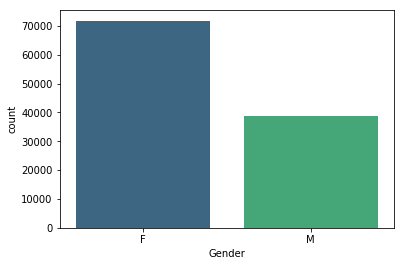

In [8]:
sns.countplot(x = 'Gender', data = df, palette = 'viridis')

1.2 Male has higher number of visit when age is around 15 years old. After that woman has higher number of vist. After around 65 years old, number of visit of both male and female is getting close.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


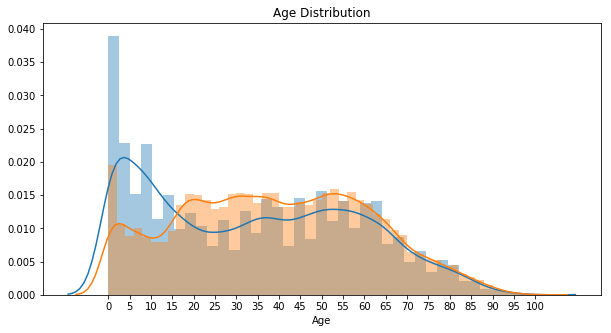

In [9]:
male = df[df['Gender']=='M']['Age']
female = df[df['Gender']=='F']['Age']

plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 105, step=5))
plt.title ('Age Distribution')
sns.distplot(male,hist = True, kde = True, label = 'Male')
sns.distplot(female,hist = True, kde= True, label = 'Female')

1.3 Tue and Wed are the peak day of appointment for both Gender. Thursday is the lowest patient visit day.

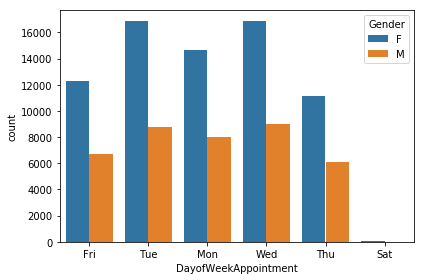

In [10]:
sns.countplot(x='DayofWeekAppointment',data = df, hue ='Gender')

plt.tight_layout()

1.4 There is no clear relationship between patient who receive sms compare to patien who don't receive SMS

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

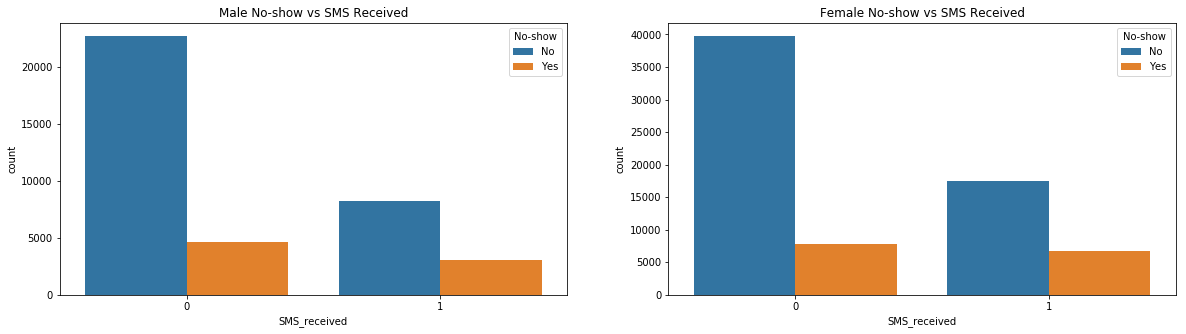

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title ('Male No-show vs SMS Received')
sns.countplot('SMS_received', data = df[df['Gender']=='M'] ,hue ='No-show')

plt.subplot(1,2,2)
plt.title ('Female No-show vs SMS Received')
sns.countplot('SMS_received', data = df[df['Gender']=='F'] ,hue ='No-show')

plt.tight_layout

### Research Question 2: Gender vs Diesese

It's clear that Male has higher percentage of Alcoholism. It seems like there is some correlation between Diabetes and Hipertension

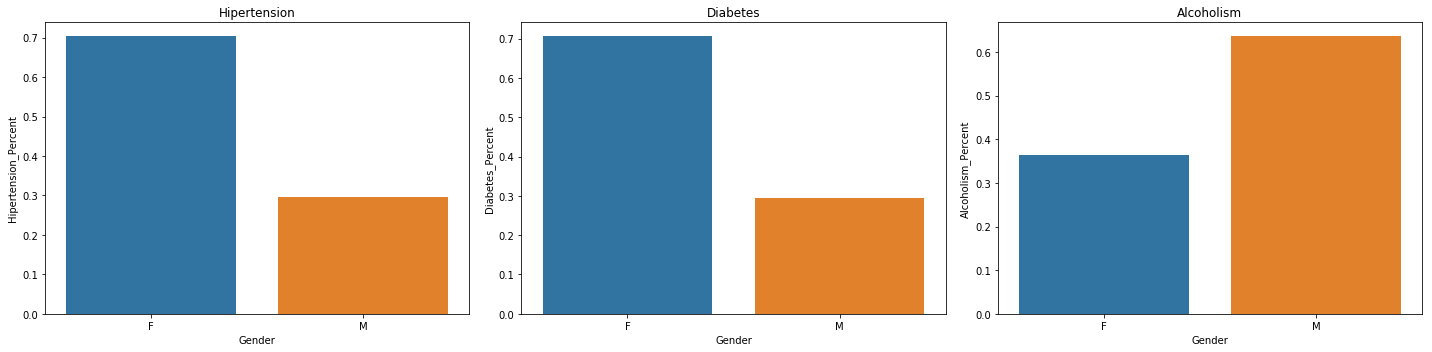

In [59]:
df1 = df.groupby(by = 'Gender').sum().reset_index()

df1

disease = ['Hipertension', 'Diabetes', 'Alcoholism']

plt.figure (figsize = (20,5))

for i,x in enumerate(disease):
    
    df1[x + '_Percent'] = df1[x]/df1.sum()[x]
    
    plt.subplot(1,3,i+1)
    
    sns.barplot(x = df1['Gender'], y= df1[x+'_Percent'])
    
    plt.title(x)

plt.tight_layout()

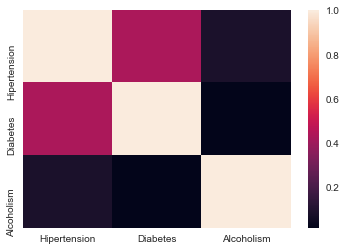

In [80]:
#df.corr()

#df2 = df.corr()['Hipertension':'Alcoholism']

df_corr = df.corr().loc['Hipertension':'Alcoholism','Hipertension':'Alcoholism']

#df2

#sns.palplot(sns.color_palette("Blues"))

#sns.set(style = "white")

sns.heatmap(df_corr)

# <a id='conclusions'></a>
## Conclusions

2 main questions have been investigated from raw data.
- Gender vs doctor visit
- Gender vs disease

We can conclude that 
1. Female has more frequent visit that male in general. However, when we drill down in to more detail. Male has higher number of visit when age is around 15 years old. After that woman has higher number of vist. After around 65 years old, number of visit of both male and female is getting close.
2. Tue and Wed are the peak day of appointment for both Gender. Thursday is the lowest patient visit day.
3. No clear relationship of show / no-show between patient who receive sms compare to patien who don't receive SMS
4. Male has higher alcoholism compare to Female
5. There is small correlation between Alcoholism and Hipertension. This point needs to be more investigated.